In [1]:
""" LIM Case Study: One-Way Range Sensitivity Analysis """
from DecisionAnalysisPy import OneWayRangeSensit
import numpy_financial as npf
""" LIM Marketing and Service Support Case Study (2025 01 26) """

' LIM Marketing and Service Support Case Study (2025 01 26) '

In [2]:
# Uncertain variable names and their [low, base, high] values
v_data = {   'nsold'   : [  25,   30,   50],
             'c_alpha' : [   9,   10,   11],
             'alpha'   : [0.13, 0.15, 0.17],
             'c_beta'  : [ 7.8,  8.0,  8.1],
             'beta'    : [0.68, 0.70, 0.72],
             'trg_c'   : [   4,    8,   10]}    

# Fixed parameters name and value
f_data = {'marr' : 0.03 }

In [3]:
# Objective functions, one for each alternative. 
# Arguments must be in the same order as above
def npv_1(nsold, c_alpha, alpha, c_beta, beta, trg_c, marr):
    return nsold*(30-(-npf.pv(marr, 5, alpha*c_alpha + beta*c_beta)))*1000
def npv_2(nsold, c_alpha, alpha, c_beta, beta, trg_c, marr):
    return nsold*(30-(-npf.pv(marr, 5, alpha*c_alpha)) -10 - trg_c)*1000
def npv_3(nsold, c_alpha, alpha, c_beta, beta, trg_c, marr):
    return (nsold*30 - max(750, 23*nsold))*1000
def npv_4(nsold, c_alpha, alpha, c_beta, beta, trg_c, marr):
    return -25.0*1000

# The alternative names and their objective functions 
obj_fns = { "Present Arrangement" : npv_1,
            "Train user"          : npv_2,
            "Contract IPX"        : npv_3,
            "Withdraw from market": npv_4 }

# Label for the objective function outputs
obj_label = "NPV($)"

In [4]:
# Perform one-way range sensitivity analysis
Lim = OneWayRangeSensit(v_data, f_data, obj_fns, obj_label)

In [5]:
# Show variable and objective base values
Lim.base_values()


Variable base values:
  nsold = 30.00
  c_alpha = 10.00
  alpha = 0.15
  c_beta = 8.00
  beta = 0.70
  trg_c = 8.00
Objective base values:
  Present Arrangement =  -75,477.63
  Train user =  153,913.18
  Contract IPX =  150,000.00
  Withdraw from market =  -25,000.00


{'Present Arrangement': -75477.63087243616,
 'Train user': 153913.17657624587,
 'Contract IPX': 150000,
 'Withdraw from market': -25000.0}

In [6]:
# Show sensitivity range tables
Lim.sensit_table()


One-Way Range Sensitivty Tables:

Present Arrangement:
  nsold     :      25.00      30.00      50.00 |   -62,898.03  -125,796.05 |   62,898.03
  c_alpha   :       9.00      10.00      11.00 |   -54,868.95   -96,086.31 |   41,217.36
  alpha     :       0.13       0.15       0.17 |   -47,999.39  -102,955.87 |   54,956.49
  c_beta    :       7.80       8.00       8.10 |   -56,242.86   -85,095.02 |   28,852.16
  beta      :       0.68       0.70       0.72 |   -53,495.04   -97,460.23 |   43,965.19
  trg_c     :       4.00       8.00      10.00 |   -75,477.63   -75,477.63 |        0.00

Train user:
  nsold     :      25.00      30.00      50.00 |   128,260.98   256,521.96 |  128,260.98
  c_alpha   :       9.00      10.00      11.00 |   174,521.86   133,304.49 |   41,217.36
  alpha     :       0.13       0.15       0.17 |   181,391.42   126,434.93 |   54,956.49
  c_beta    :       7.80       8.00       8.10 |   153,913.18   153,913.18 |        0.00
  beta      :       0.68       0.70      

{'Present Arrangement': {'nsold': [-62898.02572703014,
   -125796.05145406027,
   -62898.02572703014],
  'c_alpha': [-54868.94853006063, -96086.31321481148, -41217.36468475085],
  'alpha': [-47999.38774926875, -102955.87399560347, -54956.486246334716],
  'c_beta': [-56242.8606862192, -85095.01596554443, -28852.155279325227],
  'beta': [-53495.03637390239, -97460.22537096984, -43965.18899706745],
  'trg_c': [-75477.63087243616, -75477.63087243616, 0.0]},
 'Train user': {'nsold': [128260.98048020489,
   256521.96096040978,
   128260.98048020489],
  'c_alpha': [174521.8589186213, 133304.49423387053, -41217.36468475076],
  'alpha': [181391.41969941306, 126434.93345307867, -54956.48624633439],
  'c_beta': [153913.17657624587, 153913.17657624587, 0.0],
  'beta': [153913.17657624587, 153913.17657624587, 0.0],
  'trg_c': [273913.17657624587, 93913.17657624587, -180000.0]},
 'Contract IPX': {'nsold': [0, 350000, 350000],
  'c_alpha': [150000, 150000, 0],
  'alpha': [150000, 150000, 0],
  'c_bet

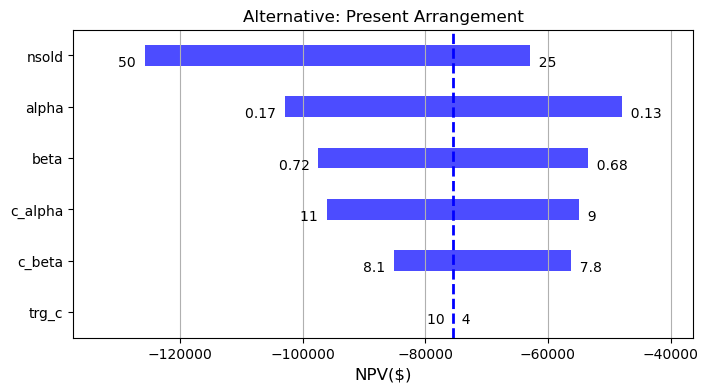

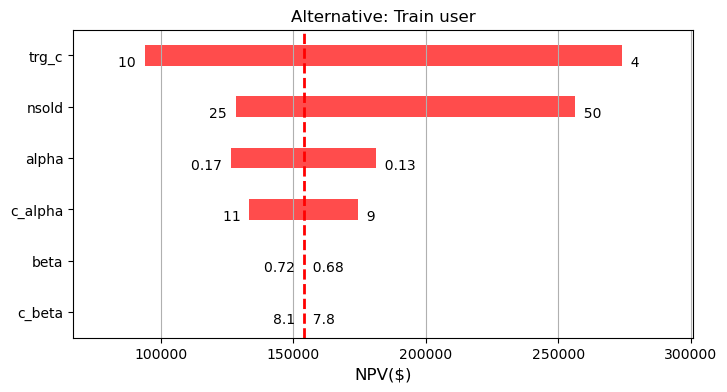

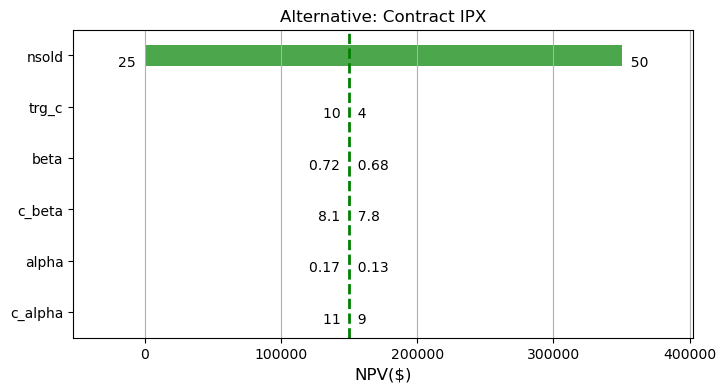

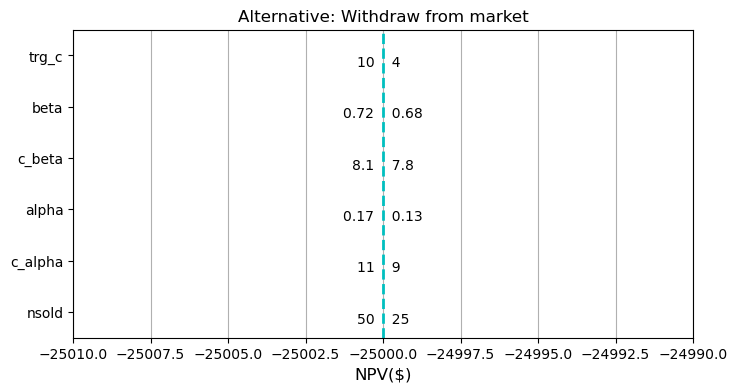

In [7]:
# Show individual tornado diagrams
Lim.tornados(annotate=True)

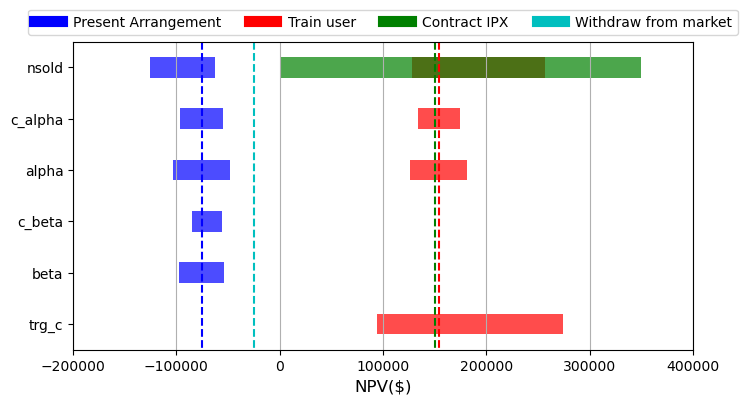

In [8]:
# Show combined tornados
Lim.combined_tornados((-200000, 400000), annotate=False)

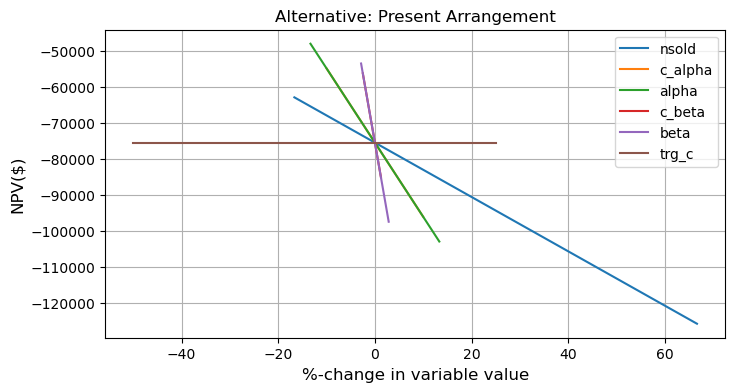

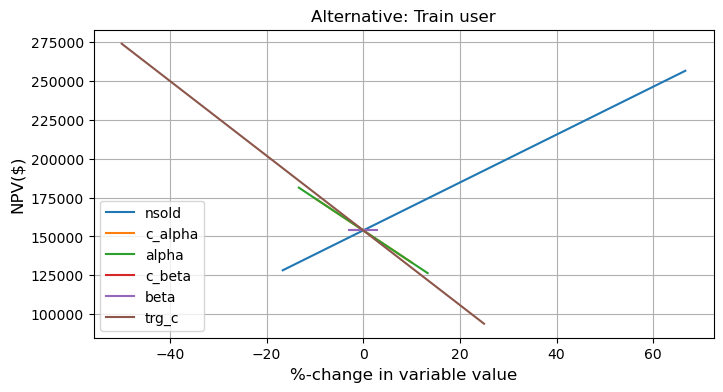

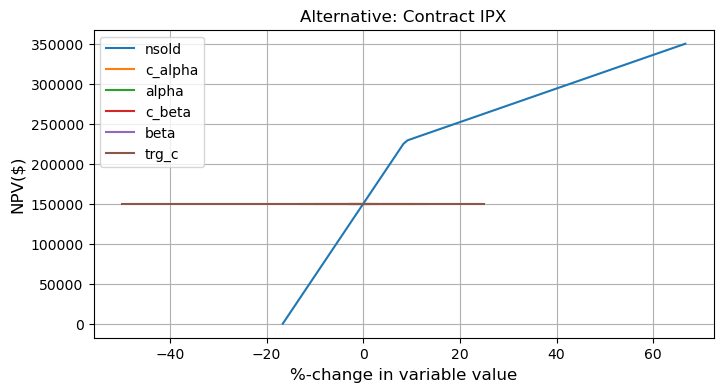

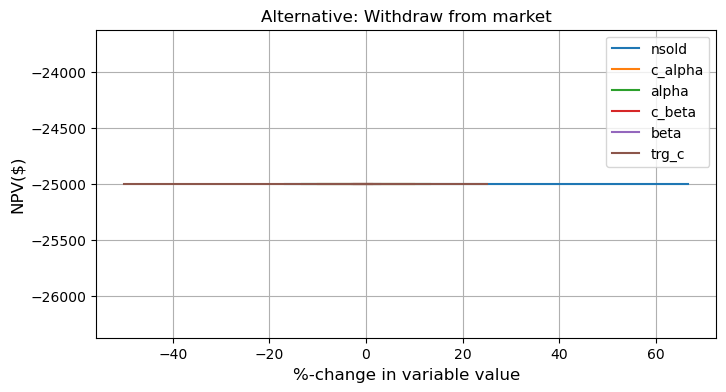

In [9]:
# Show individual spider diagrams
Lim.spiders()